In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', None)

### First XGBoost model

In [91]:
## Players features dataset
df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')
df.head()

/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_54494/3729246849.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/CollegeBasketballPlayers2009-2021.csv')


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [92]:
picked_first_round = df[df['pick']<=30]
picked_first_round.groupby('year').count()[['pick']].transpose()

year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
pick,64,62,58,56,50,45,45,45,51,47,40,35,25


In [93]:
df['pick'] = df['pick'].fillna(0)

df = df[df['pick']<=30]

df['first_round_drafted'] = np.where((df['pick']<=30) & (df['pick']>0), 1, 0)

df = df.drop('pick', axis=1)

In [94]:
df.first_round_drafted.value_counts()

first_round_drafted
0    59626
1      623
Name: count, dtype: int64

In [95]:
df = df.rename(columns = {'Unnamed: 64' : 'role'})
df = df.drop('Unnamed: 65', axis=1)

<Axes: >

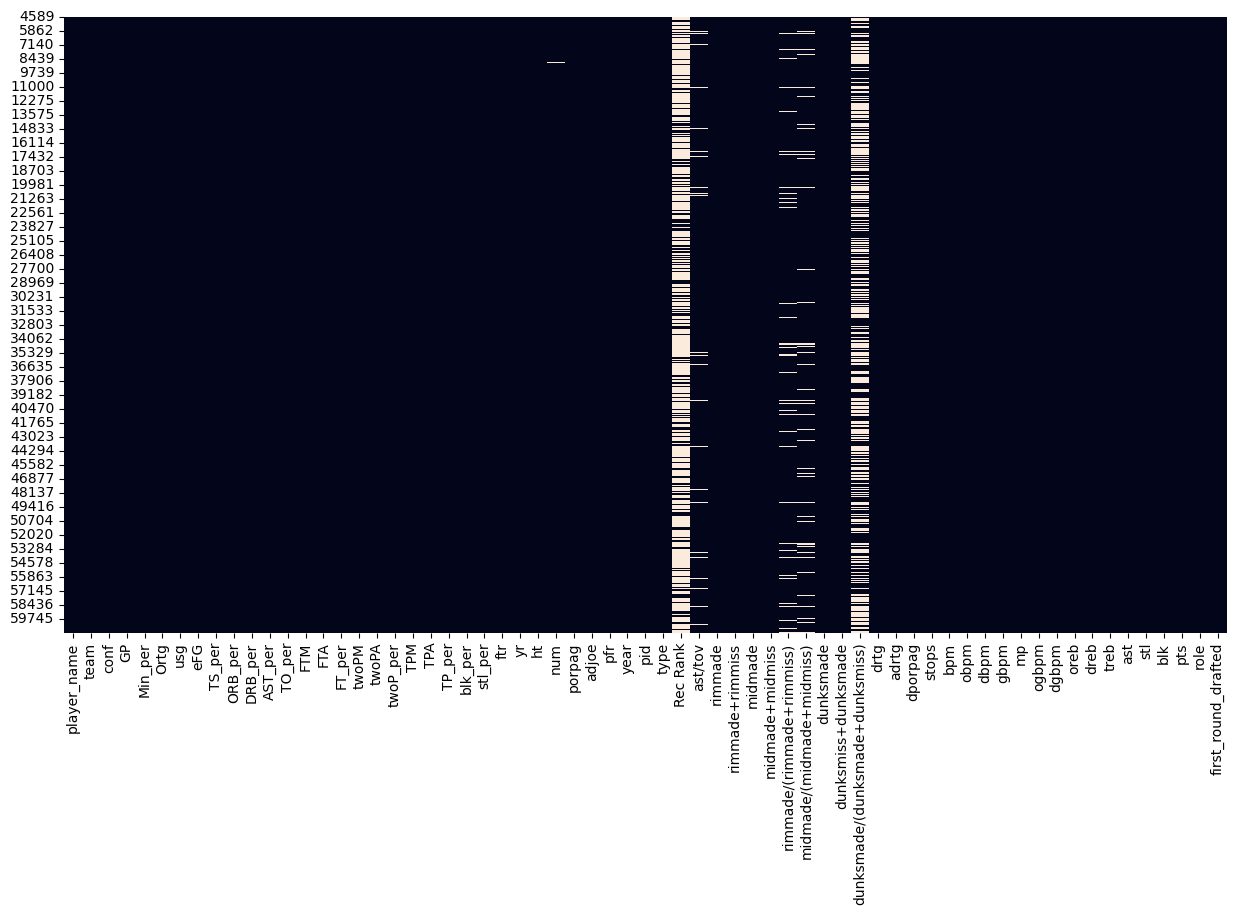

In [96]:
df = df[df.year != 2009]
df = df.dropna(thresh=len(df.columns) - 9)
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(), cbar=False)

In [97]:
df = df.drop(["Rec Rank", "dunksmade/(dunksmade+dunksmiss)"], axis=1)

In [98]:
df.columns[df.isnull().any()].tolist()

['yr',
 'ht',
 'num',
 'ast/tov',
 'rimmade',
 'rimmade+rimmiss',
 'midmade',
 'midmade+midmiss',
 'rimmade/(rimmade+rimmiss)',
 'midmade/(midmade+midmiss)',
 'dunksmade',
 'dunksmiss+dunksmade',
 'role']

In [99]:
df.yr.value_counts()

yr
Jr      14503
Fr      14085
So      12758
Sr      12489
57.1        1
0           1
42.9        1
Name: count, dtype: int64

In [100]:
df = df[df['yr'].isin(["Fr", "So", "Jr", "Sr"])]
df['yr'] = df['yr'].map({"Fr": 1, "So": 2, "Jr": 3, "Sr": 4})

In [101]:
df.ht.value_counts()

ht
7-Jun     5448
8-Jun     5333
4-Jun     5219
5-Jun     5209
6-Jun     4975
3-Jun     4967
2-Jun     4476
9-Jun     3917
1-Jun     3337
Jun-00    2805
10-Jun    2464
11-May    1383
10-May    1240
11-Jun    1091
Jul-00     648
9-May      540
8-May      215
1-Jul      200
7-May       88
2-Jul       84
3-Jul       39
6-May       36
-           27
Apr-00      16
4-Jul       12
6-Jul        7
5-May        6
2-May        4
4-May        4
5-Jul        3
0            1
1-May        1
3-May        1
5-Apr        1
Name: count, dtype: int64

In [102]:
def split_letters_numbers(s):
    letters = ''.join(re.findall("[a-zA-Z]+", s))
    numbers = ''.join(re.findall("[0-9]+", s))
    return letters, numbers

df['ht'] = df['ht'].fillna(method='ffill')

df[['ht_month', 'ht_day']] = df['ht'].astype(str).apply(lambda x: pd.Series(split_letters_numbers(x)))

/var/folders/px/tjlhxsg56bg6d74d3c4cnhrc0000gn/T/ipykernel_54494/3991656175.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['ht'] = df['ht'].fillna(method='ffill')


In [103]:
df.num.value_counts()

num
1.0      2548
5.0      2415
2.0      2384
3.0      2379
0.0      2183
         ... 
99.0        2
99          1
4A          1
31/24       1
26.0        1
Name: count, Length: 77, dtype: int64

In [104]:
def get_number(s):
    return re.findall(r'[A-Za-z]+|\d+', s)[0]

df['num'] = df['num'].astype(str).apply(lambda x: pd.Series(get_number(x)))

In [105]:
df['num'] = pd.to_numeric(df['num'], errors='coerce')

In [106]:
df = df.dropna(subset=['num'])

In [107]:
df['role'].value_counts()

role
Wing G        12190
PF/C           8846
Combo G        8812
C              7776
Scoring PG     5691
Wing F         4814
Stretch 4      3124
Pure PG        2453
Name: count, dtype: int64

In [108]:
df.role.isnull().sum()

5

In [109]:
df = df.dropna(subset=['role'])

In [110]:
df = df.fillna(0)

<Axes: >

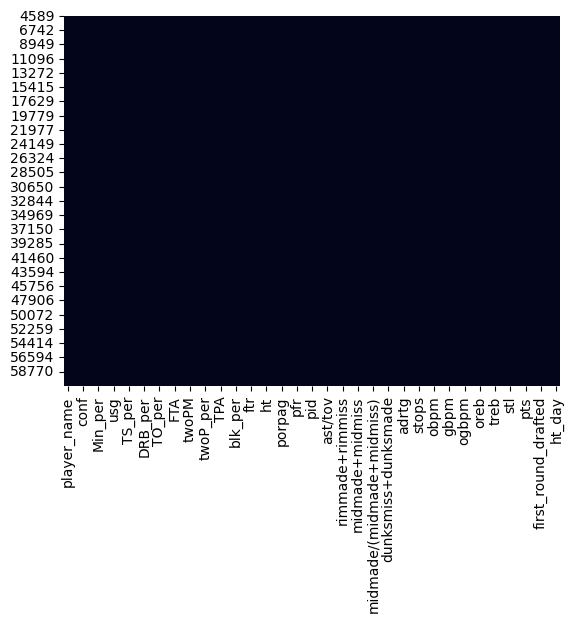

In [111]:
sns.heatmap(df.isnull(), cbar=False)

In [112]:
df.isnull().sum().sum()

0

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53706 entries, 4589 to 61057
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_name                53706 non-null  object 
 1   team                       53706 non-null  object 
 2   conf                       53706 non-null  object 
 3   GP                         53706 non-null  int64  
 4   Min_per                    53706 non-null  float64
 5   Ortg                       53706 non-null  float64
 6   usg                        53706 non-null  float64
 7   eFG                        53706 non-null  float64
 8   TS_per                     53706 non-null  float64
 9   ORB_per                    53706 non-null  float64
 10  DRB_per                    53706 non-null  float64
 11  AST_per                    53706 non-null  float64
 12  TO_per                     53706 non-null  float64
 13  FTM                        53706 non-null  int64

In [114]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [115]:
len(df.columns) == len(numerical_cols) + len(object_cols)

True

In [116]:
object_cols

['player_name', 'team', 'conf', 'ht', 'type', 'role', 'ht_month', 'ht_day']

In [117]:
#maybe frequency encoding for team?
#df = df.drop(['player_name', 'team', 'conf', 'ht', 'type'], axis=1)
df = df.drop(['player_name', 'conf', 'ht', 'type'], axis=1)

In [118]:
df.ht_month.unique().tolist()

['Jun', 'May', 'Jul', 'Apr', '']

In [119]:
df = df[df['ht_month'] != ""]

In [120]:
df.ht_day.unique().tolist()

['3', '2', '5', '4', '11', '7', '6', '10', '8', '9', '00', '1']

In [121]:
one_hot_cols = ['role', 'ht_month', 'ht_day','team']

In [122]:
for col in numerical_cols:
    num_unique = df[col].nunique()
    if num_unique <= 25:
        print(f"{col}: {num_unique}")

yr: 4
year: 12
first_round_drafted: 2


In [123]:
df.yr.value_counts()
#leave like this since ordinal structure

yr
3    14465
1    14017
2    12732
4    12466
Name: count, dtype: int64

In [124]:
df.year.value_counts()

year
2021    4612
2017    4542
2020    4530
2016    4516
2019    4510
2018    4502
2015    4496
2014    4462
2010    4435
2013    4364
2011    4360
2012    4351
Name: count, dtype: int64

In [125]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [126]:
bol_cols = df.select_dtypes(include=['bool']).columns.tolist()

In [127]:
df[bol_cols] = df[bol_cols].apply(lambda x: x.astype(int))

In [128]:
df = df.reset_index(drop=True)
df.shape

(53680, 439)

In [129]:
year_cols = [col for col in df.columns if col.startswith('year_')]

In [130]:
df_2021 = df[df['year']==2021]
df_2021 = df_2021.drop('year', axis=1)

#find a way to keep this data?
df = df[df['year']!=2021]
df = df.drop('year', axis=1)

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['first_round_drafted'])

scaler = MinMaxScaler()

cols = df.columns.tolist()
test_df = df_2021

train_df[cols] = scaler.fit_transform(train_df[cols])
val_df[cols] = scaler.transform(val_df[cols])
test_df[cols] = scaler.transform(df_2021[cols])

X_train = train_df.drop(['first_round_drafted'], axis=1)
y_train = train_df['first_round_drafted']

X_val = val_df.drop(['first_round_drafted'], axis=1)
y_val = val_df['first_round_drafted']

X_test = test_df.drop(['first_round_drafted'], axis=1)
y_test = test_df['first_round_drafted']


print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(39254, 437)
(39254,)
(9814, 437)
(9814,)
(4612, 437)
(4612,)


In [133]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [137]:
model_xgb = xgb.XGBRegressor(verbosity=2, device="cuda")

In [158]:
parameters = {'learning_rate': np.arange(0.001, 0.1, 0.005), 
              'max_depth': [4, 5, 6, 7, 8],
              'min_child_weight': [1, 2, 3, 4, 5],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 200, 300, 500],
              'alpha': np.arange(0, 2, 0.1),
              'lambda' : np.arange(0,2,0.1)}

xgb_grid = RandomizedSearchCV(model_xgb,
                        parameters,
                        cv = 4,
                        n_jobs = 1,
                        verbose=3,
                        n_iter = 500)

In [159]:
xgb_grid.fit(X_train, y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
[CV 1/4] END alpha=1.3, colsample_bytree=0.7, lambda=0.0, learning_rate=0.046, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7;, score=0.416 total time=   1.6s
[CV 2/4] END alpha=1.3, colsample_bytree=0.7, lambda=0.0, learning_rate=0.046, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7;, score=0.405 total time=   1.6s
[CV 3/4] END alpha=1.3, colsample_bytree=0.7, lambda=0.0, learning_rate=0.046, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7;, score=0.431 total time=   1.6s
[CV 4/4] END alpha=1.3, colsample_bytree=0.7, lambda=0.0, learning_rate=0.046, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7;, score=0.447 total time=   1.7s
[CV 1/4] END alpha=0.5, colsample_bytree=0.7, lambda=1.3, learning_rate=0.021, max_depth=6, min_child_weight=2, n_estimators=100, subsample=0.7;, score=0.363 total time=   0.9s
[CV 2/4] END alpha=0.5, colsample_bytree=0.7, lambd

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rat...
                                        'lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'learning_rate': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096]),
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7]},
                   verbose=3)

In [160]:
predicted_proba = xgb_grid.predict(X_test)
pred_proba_df = pd.DataFrame(predicted_proba)
pred_proba_df.columns = ['pred-prob']
df_2021 = df_2021.reset_index()

merged_df = df_2021.merge(pred_proba_df, left_index=True, right_index=True)

selected_by_model = merged_df.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    16
1.0    14
Name: count, dtype: int64

### Second XGBoost model

In [162]:
## Players features dataset
df = pd.read_csv('../df_postprocessing_unscaled.csv')
df2021 = pd.read_csv('../df_2021_postprocessing_unscaled.csv')
df.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,num,porpag,adjoe,pfr,pid,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,first_round_drafted,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G,ht_month_Jul,ht_month_Jun,ht_month_May,ht_day_1,ht_day_10,ht_day_11,ht_day_2,ht_day_3,ht_day_4,ht_day_5,ht_day_6,ht_day_7,ht_day_8,ht_day_9,team_Air Force,team_Akron,team_Alabama,team_Alabama A&M,team_Alabama St.,team_Albany,team_Alcorn St.,team_American,team_Appalachian St.,team_Arizona,team_Arizona St.,team_Arkansas,team_Arkansas Little Rock,team_Arkansas Pine Bluff,team_Arkansas St.,team_Army,team_Auburn,team_Austin Peay,team_BYU,team_Ball St.,team_Baylor,team_Bellarmine,team_Belmont,team_Bethune Cookman,team_Binghamton,team_Boise St.,team_Boston College,team_Boston University,team_Bowling Green,team_Bradley,team_Brown,team_Bryant,team_Bucknell,team_Buffalo,team_Butler,team_Cal Baptist,team_Cal Poly,team_Cal St. Bakersfield,team_Cal St. Fullerton,team_Cal St. Northridge,team_California,team_Campbell,team_Canisius,team_Centenary,team_Central Arkansas,team_Central Connecticut,team_Central Michigan,team_Charleston Southern,team_Charlotte,team_Chattanooga,team_Chicago St.,team_Cincinnati,team_Clemson,team_Cleveland St.,team_Coastal Carolina,team_Colgate,team_College of Charleston,team_Colorado,team_Colorado St.,team_Columbia,team_Connecticut,team_Coppin St.,team_Cornell,team_Creighton,team_Dartmouth,team_Davidson,team_Dayton,team_DePaul,team_Delaware,team_Delaware St.,team_Denver,team_Detroit,team_Dixie St.,team_Drake,team_Drexel,team_Duke,team_Duquesne,team_East Carolina,team_East Tennessee St.,team_Eastern Illinois,team_Eastern Kentucky,team_Eastern Michigan,team_Eastern Washington,team_Elon,team_Evansville,team_FIU,team_Fairfield,team_Fairleigh Dickinson,team_Florida,team_Florida A&M,team_Florida Atlantic,team_Florida Gulf Coast,team_Florida St.,team_Fordham,team_Fort Wayne,team_Fresno St.,team_Furman,team_Gardner Webb,team_George Mason,team_George Washington,team_Georgetown,team_Georgia,team_Georgia Southern,team_Georgia St.,team_Georgia Tech,team_Gonzaga,team_Grambling St.,team_Grand Canyon,team_Green Bay,team_Hampton,team_Hartford,team_Harvard,team_Hawaii,team_High Point,team_Hofstra,team_Holy Cross,team_Houston,team_Houston Baptist,team_Howard,team_IPFW,team_IUPUI,team_Idaho,team_Idaho St.,team_Illinois,team_Illinois Chicago,team_Illinois St.,team_Incarnate Word,team_Indiana,team_Indiana St.,team_Iona,team_Iowa,team_Iowa St.,team_Jackson St.,team_Jacksonville,team_Jacksonville St.,team_James Madison,team_Kansas,team_Kansas St.,team_Kennesaw St.,team_Kent St.,team_Kentucky,team_LIU Brooklyn,team_LSU,team_La Salle,team_Lafayette,team_Lamar,team_Lehigh,team_Liberty,team_Lipscomb,team_Little Rock,team_Long Beach St.,team_Longwood,team_Louisiana Lafayette,team_Louisiana Monroe,team_Louisiana Tech,team_Louisville,team_Loyola Chicago,team_Loyola MD,team_Loyola Marymount,team_Maine,team_Manhattan,team_Marist,team_Marquette,team_Marshall,team_Maryland,team_Maryland Eastern Shore,team_Massachusetts,team_McNeese St.,team_Memphis,team_Mercer,team_Merrimack,team_Miami FL,team_Miami OH,team_Michigan,team_Michigan St.,team_Middle Tennessee,team_Milwaukee,team_Minnesota,team_Mississippi,team_Mississippi St.,team_Mississippi Valley St.,team_Missouri,team_Missouri St.,team_Monmouth,team_Montana,team_Montana St.,team_Morehead St.,team_Morgan St.,team_Mount St. Mary's,team_Murray St.,team_NJIT,team_Navy,team_Nebraska,team_Nebraska Omaha,team_Nevada,team_New Hampshire,team_New Mexico,team_New Mexico St.,team_New Orleans,team_Niagara,team_Nicholls St.,team_Norfolk St.,team_North Alabama,team_North Carolina,team_North Carolina A&T,team_North Carolina C

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['first_round_drafted'])

scaler = MinMaxScaler()

cols = df.columns.tolist()
test_df = df_2021

train_df[cols] = scaler.fit_transform(train_df[cols])
val_df[cols] = scaler.transform(val_df[cols])
test_df[cols] = scaler.transform(df_2021[cols])

X_train = train_df.drop(['first_round_drafted'], axis=1)
y_train = train_df['first_round_drafted']

X_val = val_df.drop(['first_round_drafted'], axis=1)
y_val = val_df['first_round_drafted']

X_test = test_df.drop(['first_round_drafted'], axis=1)
y_test = test_df['first_round_drafted']


print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

(39824, 437)
(39824,)
(9957, 437)
(9957,)
(4612, 439)
(4612,)


In [184]:
X_test.drop(["level_0", "index"], axis=1, inplace=True)

In [164]:
model_xgb2 = xgb.XGBRegressor(verbosity=2, device="cuda")

In [188]:
parameters = {'learning_rate': np.arange(0.001, 0.1, 0.005), 
              'max_depth': [4, 5, 6, 7, 8],
              'min_child_weight': [1, 2, 3, 4, 5],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100, 200, 300, 500],
              'alpha': np.arange(0, 2, 0.1),
              'lambda' : np.arange(0,2,0.1)}

xgb_grid2 = RandomizedSearchCV(model_xgb2,
                        parameters,
                        cv = 4,
                        n_jobs = 1,
                        verbose=3,
                        n_iter = 500)

In [189]:
xgb_grid2.fit(X_train, y_train)

Fitting 4 folds for each of 500 candidates, totalling 2000 fits
[CV 1/4] END alpha=1.7000000000000002, colsample_bytree=0.7, lambda=1.4000000000000001, learning_rate=0.011, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7;, score=0.344 total time=   2.9s
[CV 2/4] END alpha=1.7000000000000002, colsample_bytree=0.7, lambda=1.4000000000000001, learning_rate=0.011, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7;, score=0.379 total time=   2.8s
[CV 3/4] END alpha=1.7000000000000002, colsample_bytree=0.7, lambda=1.4000000000000001, learning_rate=0.011, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7;, score=0.276 total time=   2.6s
[CV 4/4] END alpha=1.7000000000000002, colsample_bytree=0.7, lambda=1.4000000000000001, learning_rate=0.011, max_depth=6, min_child_weight=5, n_estimators=500, subsample=0.7;, score=0.361 total time=   2.7s
[CV 1/4] END alpha=1.7000000000000002, colsample_bytree=0.7, lambda=0.4, learning_rate=0.061, max_depth=4, m

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cuda',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rat...
                                        'lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                        'learning_rate': array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096]),
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7]},
                   verbose=3)

In [197]:
predicted_proba2 = xgb_grid2.predict(X_test)
pred_proba_df2 = pd.DataFrame(predicted_proba2)
pred_proba_df2.columns = ['pred-prob']
df_2021 = df_2021.reset_index(drop=True)

merged_df2 = df_2021.merge(pred_proba_df2, left_index=True, right_index=True)

selected_by_model = merged_df2.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    29
1.0     1
Name: count, dtype: int64

In [192]:
model_xgb3 = xgb.XGBRegressor(verbosity=2, device="cuda")

In [193]:
model_xgb3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [196]:
predicted_proba3 = model_xgb3.predict(X_test)
pred_proba_df3 = pd.DataFrame(predicted_proba3)
pred_proba_df3.columns = ['pred-prob']
df_2021 = df_2021.reset_index(drop=True)

merged_df3 = df_2021.merge(pred_proba_df3, left_index=True, right_index=True)

selected_by_model = merged_df3.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    29
1.0     1
Name: count, dtype: int64

### Ordinal regression

In [207]:
from sklearn.decomposition import PCA
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [213]:
pca = PCA(n_components=50)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [210]:
mod_log = OrderedModel(y_train,
                        X_train_reduced,
                        distr='logit')

In [212]:
res_log = mod_log.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 0.022427
         Iterations: 244
         Function evaluations: 250
         Gradient evaluations: 250


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                             
===============================================================================
Dep. Variable:     first_round_drafted   Log-Likelihood:                -893.15
Model:                    OrderedModel   AIC:                             1888.
Method:             Maximum Likelihood   BIC:                             2327.
Date:                 Tue, 14 Nov 2023                                         
Time:                         19:43:22                                         
No. Observations:                39824                                         
Df Residuals:                    39773                                         
Df Model:                           50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9890      0.371      8.064      0.000       2.263       3.716
x2             0.5398      0.193      2.797      0.005       0.162       0.918
x3            -0.9167      0.240     -3.826      0.000      -1.386      -0.447
x4            -0.1778      0.238     -0.748      0.454      -0.643       0.288
x5             1.9611      0.278      7.060      0.000       1.417       2.506
x6            -1.2947      0.214     -6.039      0.000      -1.715      -0.875
x7             0.2056      0.299      0.687      0.492      -0.381       0.792
x8            -0.3866      0.225     -1.721      0.085      -0.827       0.054
x9            -0.3190      0.234     -1.361      0.174      -0.778       0.140
x10            0.5169      0.196      2.637      0.008       0.133       0.901
x11            0.3038      0.261      1.166      0.244      -0.207       0.815
x12            0.7501      0.273      2.743      0.006       0.214       1.286
x13           -0.3426      0.358     -0.957      0.339      -1.044       0.359
x14            0.2107      0.485      0.435      0.664      -0.739       1.161
x15           -0.3603      0.301     -1.199      0.231      -0.950       0.229
x16            0.7202      0.301      2.395      0.017       0.131       1.310
x17            0.4911      0.359      1.369      0.171      -0.212       1.194
x18           -0.5532      0.338     -1.638      0.101      -1.215       0.109
x19            0.6828      0.528      1.294      0.196      -0.351       1.717
x20            1.6186      0.390      4.154      0.000       0.855       2.382
x21            1.0926      0.768      1.423      0.155      -0.413       2.598
x22            1.2598      0.391      3.225      0.001       0.494       2.026
x23           -0.4482      0.435     -1.031      0.303      -1.301       0.404
x24            0.1657      0.963      0.172      0.863      -1.721       2.053
x25            2.8549      0.648      4.409      0.000       1.586       4.124
x26            2.8044      0.972      2.884      0.004       0.899       4.710
x27            4.4885      0.585      7.674      0.000       3.342       5.635
x28            0.3805      0.520      0.732      0.464      -0.638       1.399
x29           -4.0011      0.589     -6.794      0.000      -5.155      -2.847
x30           -2.4451      1.117     -2.190      0.029      -4.634      -0.256
x31           -2.8809      1.311     -2.198      0.028      -5.450      -0.312
x32          -10.6287      0.868    -12.251      0.000     -12.329      -8.928
x33            5.8319      0.952      6.124      0.000       3.965       7.698
x34            4.6374      1.527      3.038      0.002       1.645       7.629
x35           -0.5878      1.276     -0.461      0.645      -3.088       1.913
x36           -3.1863      1.111     -2.869      0.004      -5.363      -1.010
x37            1.5808      0.953      1.659      0.097      -0.287     

In [222]:
predicted = res_log.model.predict(res_log.params, exog=X_test_reduced)[:,1]
predicted

array([8.08773324e-06, 1.06488542e-05, 1.22626907e-04, ...,
       1.45387674e-05, 1.45460737e-04, 6.94169754e-05])

In [223]:
pred_proba_df4 = pd.DataFrame(predicted)
pred_proba_df4.columns = ['pred-prob']
df_2021 = df_2021.reset_index(drop=True)

merged_df4 = df_2021.merge(pred_proba_df4, left_index=True, right_index=True)

selected_by_model = merged_df4.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    28
1.0     2
Name: count, dtype: int64

In [224]:
mod_log = OrderedModel(y_train,
                        X_train,
                        distr='logit')
res_log = mod_log.fit(method='bfgs')
res_log.summary()

/Users/valentinpinon/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 0.017213
         Iterations: 500
         Function evaluations: 504
         Gradient evaluations: 504


/Users/valentinpinon/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/valentinpinon/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OrderedModel Results                             
===============================================================================
Dep. Variable:     first_round_drafted   Log-Likelihood:                -685.49
Model:                    OrderedModel   AIC:                             2247.
Method:             Maximum Likelihood   BIC:                             6010.
Date:                 Tue, 14 Nov 2023                                         
Time:                         20:56:07                                         
No. Observations:                39824                                         
Df Residuals:                    39386                                         
Df Model:                          437                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
GP                              4.6420        nan        nan        nan         nan         nan
Min_per                        -2.1438        nan        nan        nan         nan         nan
Ortg                           -2.3653        nan        nan        nan         nan         nan
usg                             5.7988        nan        nan        nan         nan         nan
eFG                            -3.3507        nan        nan        nan         nan         nan
TS_per                         -3.9790        nan        nan        nan         nan         nan
ORB_per                        -1.0846        nan        nan        nan         nan         nan
DRB_per                        -1.1190        nan        nan        nan         nan         nan
AST_per                       -16.7016        nan        nan        nan         nan         nan
TO_per                          9.6715        nan        nan        nan         nan         nan
FTM                            -5.5817        nan        nan        nan         nan         nan
FTA                             4.5557        nan        nan        nan         nan         nan
FT_per                          1.6140        nan        nan        nan         nan         nan
twoPM                           0.6514        nan        nan        nan         nan         nan
twoPA                          -0.3448        nan        nan        nan         nan         nan
twoP_per                       -4.3279        nan        nan        nan         nan         nan
TPM                             9.8135        nan        nan        nan         nan         nan
TPA                            -5.6538        nan        nan        nan         nan         nan
TP_per                         -0.9567        nan        nan        nan         nan         nan
blk_per                        -1.2475        nan        nan        nan         nan         nan
stl_per                        -1.9993        nan        nan        nan         nan         nan
ftr                             0.5964        nan        nan        nan         nan         nan
yr                             -1.3372        nan        nan        nan         nan         nan
num                            -1.1840        nan        nan        nan         nan         nan
porpag                         20.3214        nan        nan        nan         nan         nan
adjoe                           1.7309        nan        nan        nan         nan         nan
pfr                            -2.3797        nan        nan        nan         nan         nan
pid                            -0.4384        nan        nan        nan         nan         nan
ast/tov                        -2.3596        nan        nan        nan         nan         nan
rimmade                         2.4792        nan        nan        nan         

In [227]:
predicted2 = res_log.model.predict(res_log.params, exog=X_test)[:,1]
predicted2

array([1.38527063e-07, 6.92393659e-08, 5.57754047e-07, ...,
       1.59992350e-08, 6.91601199e-09, 1.38930422e-07])

In [228]:
pred_proba_df5 = pd.DataFrame(predicted2)
pred_proba_df5.columns = ['pred-prob']
df_2021 = df_2021.reset_index(drop=True)

merged_df5 = df_2021.merge(pred_proba_df5, left_index=True, right_index=True)

selected_by_model = merged_df5.sort_values('pred-prob', ascending=False).head(30)
selected_by_model.first_round_drafted.value_counts()

first_round_drafted
0.0    28
1.0     2
Name: count, dtype: int64